# Advanced Color Harmony & Design Principles

## Introduction

Most artists learn about complementary colors in school, but **color harmony goes much deeper**. This notebook explores computational methods to detect and analyze advanced color relationships that master artists use intuitively.

### What You'll Learn

- **Triadic Harmonies**: Three colors equally spaced (120° apart) on the color wheel
- **Split-Complementary**: A sophisticated alternative to direct complements
- **Analogous Schemes**: Adjacent colors that create serene, cohesive palettes
- **Tetradic Harmonies**: Two complementary pairs for complex, rich compositions
- **Computational Detection**: How to find these patterns in real artwork
- **Breaking the Rules**: When masters intentionally use color discord

### Why This Matters for Artists

Understanding color harmony mathematically helps you:
1. **Reverse-engineer** masterpieces to learn techniques
2. **Intentionally design** harmonious or discordant palettes
3. **Critique** your own work objectively
4. **Communicate** color decisions to clients/collaborators

Let's dive in!

## Setup

First, import the necessary libraries:

In [1]:
from renoir import ArtistAnalyzer
from renoir.color import ColorExtractor, ColorAnalyzer, ColorVisualizer
import matplotlib.pyplot as plt
import numpy as np

# Initialize our tools
artist_analyzer = ArtistAnalyzer()
color_extractor = ColorExtractor()
color_analyzer = ColorAnalyzer()
visualizer = ColorVisualizer()

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (14, 8)

## Part 1: Understanding Color Harmonies

### The Color Wheel: Your Mathematical Foundation

Colors are arranged in a circle (0-360°):
- **0° / 360°**: Red
- **60°**: Yellow
- **120°**: Green
- **180°**: Cyan
- **240°**: Blue
- **300°**: Magenta

### The Five Major Harmonies

1. **Complementary** (180° apart): Maximum contrast, vibrant
2. **Triadic** (120° apart): Balanced, vibrant, stable
3. **Analogous** (0-60° range): Serene, cohesive, natural
4. **Split-Complementary** (base + two colors flanking complement): Softer contrast
5. **Tetradic** (two complementary pairs): Rich, complex, needs balance

Let's visualize these:

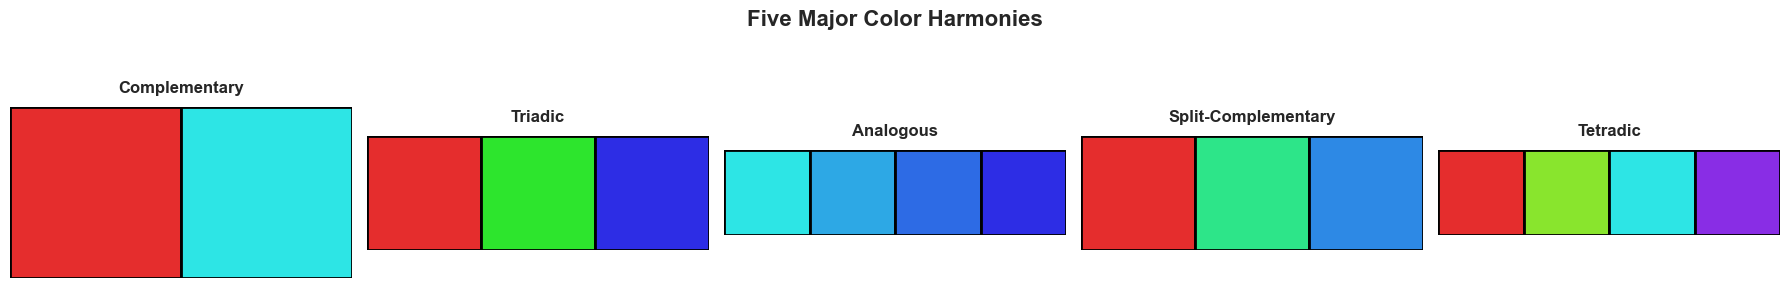

Key Insights:
- Complementary: Maximum visual tension and energy
- Triadic: Perfect balance, used in primary colors (RYB) and RGB
- Analogous: Flows naturally, seen often in nature
- Split-Complementary: Softer than complementary, more sophisticated
- Tetradic: Most complex, requires careful balancing


In [2]:
# Create example palettes for each harmony type
def hue_to_rgb(hue):
    """Convert hue (0-360) to RGB"""
    return color_analyzer.hsv_to_rgb((hue, 80, 90))

# Define harmony examples
harmonies = {
    'Complementary': [hue_to_rgb(0), hue_to_rgb(180)],
    'Triadic': [hue_to_rgb(0), hue_to_rgb(120), hue_to_rgb(240)],
    'Analogous': [hue_to_rgb(180), hue_to_rgb(200), hue_to_rgb(220), hue_to_rgb(240)],
    'Split-Complementary': [hue_to_rgb(0), hue_to_rgb(150), hue_to_rgb(210)],
    'Tetradic': [hue_to_rgb(0), hue_to_rgb(90), hue_to_rgb(180), hue_to_rgb(270)]
}

# Visualize each harmony
fig, axes = plt.subplots(1, 5, figsize=(18, 3))

for ax, (name, colors) in zip(axes, harmonies.items()):
    # Create color swatches
    colors_normalized = [(r/255, g/255, b/255) for r, g, b in colors]
    
    for i, color in enumerate(colors_normalized):
        ax.add_patch(plt.Rectangle((i, 0), 1, 1, facecolor=color, edgecolor='black', linewidth=2))
    
    ax.set_xlim(0, len(colors))
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(name, fontsize=12, fontweight='bold', pad=10)

plt.suptitle('Five Major Color Harmonies', fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

print("Key Insights:")
print("- Complementary: Maximum visual tension and energy")
print("- Triadic: Perfect balance, used in primary colors (RYB) and RGB")
print("- Analogous: Flows naturally, seen often in nature")
print("- Split-Complementary: Softer than complementary, more sophisticated")
print("- Tetradic: Most complex, requires careful balancing")

## Part 2: Detecting Harmonies in Real Artwork

Let's analyze a real artist's palette to see which harmonies they naturally use.

### Case Study: Henri Matisse (Fauvism)

Matisse was known for bold, vibrant colors. Let's computationally analyze his color choices:

In [ ]:
# Extract Matisse's works
print("Loading Matisse's artworks...")
matisse_works = artist_analyzer.extract_artist_works('henri-matisse', limit=10)
print(f"Loaded {len(matisse_works)} works\n")

# Extract dominant colors from first artwork
if matisse_works:
    sample_work = matisse_works[0]
    colors = color_extractor.extract_dominant_colors(sample_work['image'], n_colors=8)
    color_list = colors  # extract_dominant_colors returns list of RGB tuples
    
    print(f"Analyzing: {sample_work.get('title', 'Untitled')}")
    print(f"Extracted {len(color_list)} dominant colors\n")
    
    # Visualize the palette
    visualizer.plot_palette(colors, title=f"Matisse's Palette: {sample_work.get('title', 'Untitled')}")
else:
    print("Could not load Matisse works. Try another artist or check connection.")

### Comprehensive Harmony Analysis

Now let's detect ALL harmony types present in this palette:

In [ ]:
# Perform comprehensive harmony analysis
if matisse_works:
    harmony_analysis = color_analyzer.analyze_color_harmony(color_list)
    
    print("=" * 60)
    print("COLOR HARMONY ANALYSIS")
    print("=" * 60)
    
    print(f"\nHarmony Counts:")
    for harmony_type, count in harmony_analysis['harmony_counts'].items():
        print(f"  {harmony_type.replace('_', ' ').title()}: {count}")
    
    print(f"\nTotal harmonies detected: {harmony_analysis['total_harmonies']}")
    print(f"Harmony score: {harmony_analysis['harmony_score']:.2f} (0-1 scale)")
    print(f"Dominant harmony type: {harmony_analysis['dominant_harmony'].replace('_', ' ').title()}")
    
    # Detail the specific color sets found
    print("\n" + "=" * 60)
    print("DETECTED HARMONY SETS")
    print("=" * 60)
    
    if harmony_analysis['complementary_pairs']:
        print(f"\nComplementary Pairs: {len(harmony_analysis['complementary_pairs'])}")
        for i, (c1, c2) in enumerate(harmony_analysis['complementary_pairs'][:3], 1):
            h1 = color_analyzer.rgb_to_hsv(c1)[0]
            h2 = color_analyzer.rgb_to_hsv(c2)[0]
            print(f"  Pair {i}: Hue {h1:.0f}° ↔ Hue {h2:.0f}°")
    
    if harmony_analysis['triadic_sets']:
        print(f"\nTriadic Sets: {len(harmony_analysis['triadic_sets'])}")
        for i, (c1, c2, c3) in enumerate(harmony_analysis['triadic_sets'][:2], 1):
            h1 = color_analyzer.rgb_to_hsv(c1)[0]
            h2 = color_analyzer.rgb_to_hsv(c2)[0]
            h3 = color_analyzer.rgb_to_hsv(c3)[0]
            print(f"  Triad {i}: {h1:.0f}° - {h2:.0f}° - {h3:.0f}°")
    
    if harmony_analysis['analogous_groups']:
        print(f"\nAnalogous Groups: {len(harmony_analysis['analogous_groups'])}")
        for i, group in enumerate(harmony_analysis['analogous_groups'][:2], 1):
            hues = [color_analyzer.rgb_to_hsv(c)[0] for c in group]
            hue_range = max(hues) - min(hues)
            print(f"  Group {i}: {len(group)} colors spanning {hue_range:.0f}°")
    
    if harmony_analysis['split_complementary_sets']:
        print(f"\nSplit-Complementary Sets: {len(harmony_analysis['split_complementary_sets'])}")
    
    if harmony_analysis['tetradic_sets']:
        print(f"\nTetradic Sets: {len(harmony_analysis['tetradic_sets'])}")

## Part 3: Comparing Artists' Harmony Preferences

Different artistic movements favor different harmony types. Let's compare:

- **Impressionists** (Monet): Analogous colors, natural light
- **Fauvists** (Matisse): Bold complementary and triadic
- **Expressionists** (Munch): Discordant, emotionally charged

### Multi-Artist Comparison

In [ ]:
# Compare three artists from different movements
artists_to_compare = [
    ('claude-monet', 'Monet (Impressionism)'),
    ('henri-matisse', 'Matisse (Fauvism)'),
    ('edvard-munch', 'Munch (Expressionism)')
]

comparison_results = {}

for artist_id, artist_name in artists_to_compare:
    print(f"\nAnalyzing {artist_name}...")
    
    try:
        works = artist_analyzer.extract_artist_works(artist_id, limit=5)
        
        if works:
            # Aggregate colors from multiple works
            all_colors = []
            for work in works:
                palette = color_extractor.extract_dominant_colors(work['image'], n_colors=5)
                all_colors.extend(palette)  # palette is already a list of RGB tuples
            
            # Analyze harmonies
            harmony = color_analyzer.analyze_color_harmony(all_colors)
            comparison_results[artist_name] = harmony
            print(f"  ✓ Analyzed {len(all_colors)} colors")
    except Exception as e:
        print(f"  ✗ Error: {e}")

print("\nAnalysis complete!")

### Visualize the Comparison

In [ ]:
# Create comparison visualization
if comparison_results:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Extract data
    artists = list(comparison_results.keys())
    harmony_types = ['complementary', 'triadic', 'analogous', 'split_complementary', 'tetradic']
    
    # Prepare data for plotting
    data = {ht: [] for ht in harmony_types}
    for artist in artists:
        for ht in harmony_types:
            data[ht].append(comparison_results[artist]['harmony_counts'][ht])
    
    # Plot 1: Grouped bar chart
    x = np.arange(len(artists))
    width = 0.15
    colors_map = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6']
    
    for i, (ht, color) in enumerate(zip(harmony_types, colors_map)):
        offset = width * (i - 2)
        axes[0].bar(x + offset, data[ht], width, label=ht.replace('_', ' ').title(), color=color)
    
    axes[0].set_xlabel('Artist', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Number of Harmonies Detected', fontsize=12, fontweight='bold')
    axes[0].set_title('Color Harmony Comparison Across Artists', fontsize=14, fontweight='bold')
    axes[0].set_xticks(x)
    axes[0].set_xticklabels(artists, rotation=15, ha='right')
    axes[0].legend(loc='upper left', fontsize=10)
    axes[0].grid(axis='y', alpha=0.3)
    
    # Plot 2: Harmony scores
    harmony_scores = [comparison_results[artist]['harmony_score'] for artist in artists]
    dominant_types = [comparison_results[artist]['dominant_harmony'] for artist in artists]
    
    bars = axes[1].bar(artists, harmony_scores, color=['#3498db', '#e74c3c', '#2ecc71'])
    axes[1].set_ylabel('Harmony Score (0-1)', fontsize=12, fontweight='bold')
    axes[1].set_title('Overall Harmony Score by Artist', fontsize=14, fontweight='bold')
    axes[1].set_xticklabels(artists, rotation=15, ha='right')
    axes[1].set_ylim(0, 1)
    axes[1].grid(axis='y', alpha=0.3)
    
    # Add dominant harmony type labels
    for i, (bar, dominant) in enumerate(zip(bars, dominant_types)):
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.02,
                    f'{dominant.replace("_", " ").title()}',
                    ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Print insights
    print("\n" + "=" * 60)
    print("KEY INSIGHTS")
    print("=" * 60)
    for artist in artists:
        result = comparison_results[artist]
        print(f"\n{artist}:")
        print(f"  Dominant harmony: {result['dominant_harmony'].replace('_', ' ').title()}")
        print(f"  Harmony score: {result['harmony_score']:.2f}")
        print(f"  Total harmonies: {result['total_harmonies']}")

## Part 4: Practical Applications

### Application 1: Generate Harmonious Palettes

Use detected harmonies to create new, balanced color schemes:

In [ ]:
def generate_triadic_palette(base_hue, saturation=75, value=85):
    """
    Generate a perfect triadic palette from a base hue.
    
    Args:
        base_hue: Starting hue (0-360)
        saturation: Saturation level (0-100)
        value: Brightness level (0-100)
    
    Returns:
        List of three RGB tuples
    """
    hues = [base_hue, (base_hue + 120) % 360, (base_hue + 240) % 360]
    return [color_analyzer.hsv_to_rgb((h, saturation, value)) for h in hues]

def generate_split_complementary(base_hue, saturation=75, value=85):
    """
    Generate a split-complementary palette.
    """
    complement = (base_hue + 180) % 360
    hues = [base_hue, (complement - 30) % 360, (complement + 30) % 360]
    return [color_analyzer.hsv_to_rgb((h, saturation, value)) for h in hues]

# Generate example palettes
base_hue = 15  # Orange-red

triadic = generate_triadic_palette(base_hue)
split_comp = generate_split_complementary(base_hue)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(12, 3))

palettes = [triadic, split_comp]
titles = ['Generated Triadic', 'Generated Split-Complementary']

for ax, palette, title in zip(axes, palettes, titles):
    colors_norm = [(r/255, g/255, b/255) for r, g, b in palette]
    
    for i, color in enumerate(colors_norm):
        ax.add_patch(plt.Rectangle((i, 0), 1, 1, facecolor=color, edgecolor='black', linewidth=2))
    
    ax.set_xlim(0, len(palette))
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(title, fontsize=12, fontweight='bold')

plt.suptitle(f'Programmatically Generated Palettes (Base Hue: {base_hue}°)', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

print("\nTry changing the base_hue value above to generate different palettes!")
print("Common base hues: Red=0, Orange=30, Yellow=60, Green=120, Blue=240, Purple=270")

### Application 2: Detect "Rule Breaking" - Color Discord

Sometimes artists **intentionally** avoid harmonies for dramatic effect. Let's detect this:

In [ ]:
def analyze_color_discord(colors):
    """
    Analyze how 'discordant' a palette is.
    Low harmony + high diversity = intentional discord.
    """
    harmony = color_analyzer.analyze_color_harmony(colors)
    diversity = color_analyzer.calculate_color_diversity(colors)
    
    # Discord score: high diversity but low harmony
    discord_score = diversity * (1 - harmony['harmony_score'])
    
    return {
        'discord_score': discord_score,
        'diversity': diversity,
        'harmony_score': harmony['harmony_score'],
        'interpretation': 'Highly discordant' if discord_score > 0.5 else 
                         'Moderately discordant' if discord_score > 0.3 else 
                         'Harmonious'
    }

# Test with an expressionist artist known for jarring colors
print("Analyzing color discord in Expressionist art...\n")

try:
    munch_works = artist_analyzer.extract_artist_works('edvard-munch', limit=3)
    
    if munch_works:
        for i, work in enumerate(munch_works, 1):
            colors = color_extractor.extract_dominant_colors(work['image'], n_colors=6)
            color_list = colors  # extract_dominant_colors returns list of RGB tuples
            
            discord = analyze_color_discord(color_list)
            
            print(f"Work {i}: {work.get('title', 'Untitled')}")
            print(f"  Discord score: {discord['discord_score']:.2f}")
            print(f"  Diversity: {discord['diversity']:.2f}")
            print(f"  Harmony score: {discord['harmony_score']:.2f}")
            print(f"  → {discord['interpretation']}\n")
except Exception as e:
    print(f"Error: {e}")

print("\nInsight: Expressionists often use high discord to convey emotion and tension,")
print("while Impressionists use harmonious, analogous colors for serenity.")

## Part 5: Advanced Exercise - Visualize Harmony on the Color Wheel

Let's create a color wheel visualization showing detected harmonies:

In [ ]:
def plot_harmony_wheel(colors, harmony_analysis):
    """
    Plot colors on a color wheel and draw lines between harmonious colors.
    """
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
    
    # Convert colors to HSV
    hsv_colors = [color_analyzer.rgb_to_hsv(c) for c in colors]
    
    # Plot each color as a point on the wheel
    for i, (rgb, hsv) in enumerate(zip(colors, hsv_colors)):
        theta = np.radians(hsv[0])  # Hue as angle
        r = 1  # All on outer ring
        
        # Normalize RGB for matplotlib
        color_norm = (rgb[0]/255, rgb[1]/255, rgb[2]/255)
        
        ax.scatter(theta, r, c=[color_norm], s=500, edgecolors='black', linewidth=2, zorder=5)
    
    # Draw lines between complementary pairs
    for c1, c2 in harmony_analysis['complementary_pairs'][:5]:  # Limit to avoid clutter
        h1 = np.radians(color_analyzer.rgb_to_hsv(c1)[0])
        h2 = np.radians(color_analyzer.rgb_to_hsv(c2)[0])
        ax.plot([h1, h2], [1, 1], 'r-', linewidth=2, alpha=0.6, label='Complementary' if 'Complementary' not in ax.get_legend_handles_labels()[1] else '')
    
    # Draw triangles for triadic sets
    for c1, c2, c3 in harmony_analysis['triadic_sets'][:3]:
        h1 = np.radians(color_analyzer.rgb_to_hsv(c1)[0])
        h2 = np.radians(color_analyzer.rgb_to_hsv(c2)[0])
        h3 = np.radians(color_analyzer.rgb_to_hsv(c3)[0])
        ax.plot([h1, h2, h3, h1], [1, 1, 1, 1], 'b-', linewidth=2, alpha=0.4, label='Triadic' if 'Triadic' not in ax.get_legend_handles_labels()[1] else '')
    
    ax.set_ylim(0, 1.2)
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    ax.set_xticks(np.radians([0, 60, 120, 180, 240, 300]))
    ax.set_xticklabels(['0° Red', '60° Yellow', '120° Green', '180° Cyan', '240° Blue', '300° Magenta'])
    ax.set_yticks([])
    ax.set_title('Color Harmony Wheel\nLines connect harmonious colors', fontsize=14, fontweight='bold', pad=20)
    
    if ax.get_legend_handles_labels()[1]:
        ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    
    plt.tight_layout()
    plt.show()

# Use colors from previous analysis
if matisse_works:
    plot_harmony_wheel(color_list, harmony_analysis)
    print("\nThe wheel shows:")
    print("- Each dot is a dominant color from the artwork")
    print("- Red lines connect complementary pairs (opposite on wheel)")
    print("- Blue triangles show triadic harmonies (120° spacing)")

## Part 6: Key Takeaways & Discussion

### What We've Learned

1. **Color harmony is mathematical** - but artists use it intuitively
2. **Different movements favor different harmonies**:
   - Impressionists: Analogous (serene, natural)
   - Fauvists: Complementary & Triadic (bold, vibrant)
   - Expressionists: Discordant (emotional, tense)
3. **Computational analysis reveals patterns** invisible to the naked eye
4. **Breaking rules intentionally** is different from breaking them accidentally

### Questions for Reflection

1. **Historical Context**: Why might Impressionists favor analogous colors? (Hint: They painted outdoors, capturing natural light)

2. **Medium Matters**: Digital RGB vs. traditional pigments - how might this affect harmony?

3. **Cultural Differences**: Do color harmony principles hold across all cultures?

4. **Your Own Work**: Analyze your recent artwork - what's your dominant harmony type?

### Practical Exercises

1. **Reverse Engineering**: Pick a famous painting. Predict its harmony type, then test computationally.

2. **Intentional Discord**: Create a deliberately discordant palette. When might this be useful?

3. **Movement Study**: Compare Renaissance vs. Modern art. Has color harmony usage changed?

4. **Build a Tool**: Create a function that suggests harmonious accent colors for a given palette.

### Further Reading

- **Josef Albers** - "Interaction of Color" (how context changes color perception)
- **Johannes Itten** - "The Art of Color" (color wheel and harmonies)
- **Color Theory in Web Design** - Modern applications of classical principles
- **Perceptual Color Spaces** (CIE Lab, LCH) - Beyond RGB/HSV

## Part 7: Your Turn - Interactive Exercise

Use the cell below to analyze any artist you're interested in:

In [ ]:
# YOUR CODE HERE
# Try artists like:
# - 'vincent-van-gogh' (Post-Impressionism)
# - 'pablo-picasso' (Cubism - different periods had different palettes!)
# - 'wassily-kandinsky' (Abstract - very intentional color use)
# - 'frida-kahlo' (Surrealism with Mexican folk art influences)
# - 'mark-rothko' (Color Field - explores subtle color relationships)

artist_name = 'vincent-van-gogh'  # Change this!

# Your analysis code here...


---

## Conclusion

You've now learned to:
- Detect five major color harmonies computationally
- Analyze real artworks for harmony patterns
- Compare artists' color preferences quantitatively
- Generate harmonious palettes programmatically
- Identify intentional color discord

**Remember**: These are tools for understanding, not rules to follow blindly. Great artists know the rules so they can break them effectively.

### Next Steps

- Explore perceptual color spaces (CIE Lab) for even more accurate analysis
- Study temporal changes in an artist's palette over their career
- Build a machine learning classifier to predict artistic movement from color alone
- Apply these techniques to your own artwork for objective self-critique

Happy analyzing! 🎨